In [1]:
import pandas as pd
import re
import requests
from nltk.util import bigrams

import time
from datetime import datetime 

start_time = datetime.now() 

In [2]:
df = pd.read_csv('sentences_521_features_46.csv')
df

,sentence,mdd,t_depth,no_change,summarizing,bigrams,words,letters,word_avg,numbers,...,RB,CC,AT,QW,REL,PRP,IN,DTT,DT,MD
0,והנפיחות בעיניים?,3.75,4,1,0,1,2,15,7.500,0,...,0,0,0,0,0,0,0,0,0,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",14.82,34,0,1,25,25,130,5.200,0,...,2,2,0,0,0,0,0,0,0,0
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,14.41,28,0,1,19,21,99,4.714,0,...,0,2,2,2,2,4,2,0,0,0
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,18.42,36,0,1,25,26,126,4.846,0,...,2,2,2,0,2,0,4,2,0,0
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",19.70,43,0,1,24,24,139,5.792,0,...,0,0,0,2,4,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,"הורים יקרים,במדריך הזה מפורט התהליך העומד בפני...",16.91,33,0,1,22,24,122,5.083,0,...,0,0,2,0,8,2,6,0,0,0
517,מהיום ניתן לקבל את חשבון הארנונה ישירות לדואר...,7.17,15,0,1,11,12,62,5.167,0,...,2,0,2,0,0,0,0,0,0,2
518,".תורם לאיכות הסביבה, קבלת חשבון ארנונה תקופתי ...",13.08,25,0,1,18,19,92,4.842,0,...,0,0,0,0,0,0,4,0,0,2
519,ניתן לקבל את חשבון הארנונה למייל במילוי טופס.,5.27,12,0,1,7,8,37,4.625,0,...,0,0,2,0,0,0,0,0,0,2


In [3]:
df.keys()

Index(['sentence', 'mdd', 't_depth', 'no_change', 'summarizing', 'bigrams',
       'words', 'letters', 'word_avg', 'numbers', 'symbols', 'if_question',
       'punctuation', 'sym_hashtag', 'sym_shtrudel', 'sym_dollar',
       'sym_ampersand', 'sym_percend', 'sym_star', 'sym_tilda', 'sym_math',
       'sym_logic', 'sym_brackets', 'sym_num', 'sym_quotes', 'sym_slashes',
       'NN', 'VB', 'JJ', 'PREPOSITION', 'DEF', 'CONJ', 'BN', 'NNP', 'NNT',
       'TEMP', 'RB', 'CC', 'AT', 'QW', 'REL', 'PRP', 'IN', 'DTT', 'DT', 'MD'],
      dtype='object')

In [4]:
df = pd.DataFrame(df, columns=['sentence', 'summarizing'])
df

,sentence,summarizing
0,והנפיחות בעיניים?,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",1
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,1
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,1
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",1
...,...,...
516,"הורים יקרים,במדריך הזה מפורט התהליך העומד בפני...",1
517,מהיום ניתן לקבל את חשבון הארנונה ישירות לדואר...,1
518,".תורם לאיכות הסביבה, קבלת חשבון ארנונה תקופתי ...",1
519,ניתן לקבל את חשבון הארנונה למייל במילוי טופס.,1


In [5]:
df419 = pd.read_csv('sentences_419.csv')
df419

,sentence,summarizing
0,לא עשינו זאת מעולם.,0
1,זה מסובך מדי.,0
2,אין לנו משאבים.,0
3,זה לעולם לא יעבוד.,0
4,אין לנו מספיק זמן.,0
...,...,...
414,האם אוהבים אותו כי הוא מצחיק משעשע?,0
415,יש לו מסיכה של ביטחון עצמי?,0
416,אז יום אחד הוא בכה.,0
417,ולמה אתם לא בוכים?,0


In [6]:
df = df.append(df419, ignore_index=True)
df

,sentence,summarizing
0,והנפיחות בעיניים?,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",1
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,1
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,1
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",1
...,...,...
935,האם אוהבים אותו כי הוא מצחיק משעשע?,0
936,יש לו מסיכה של ביטחון עצמי?,0
937,אז יום אחד הוא בכה.,0
938,ולמה אתם לא בוכים?,0


In [7]:
# for i in range(350):
#     if df['summarizing'][i] == 1:
#         df.drop(i, axis='rows', inplace=True)

In [8]:
# print(df['summarizing'].sum())

In [9]:
df

,sentence,summarizing
0,והנפיחות בעיניים?,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",1
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,1
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,1
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",1
...,...,...
935,האם אוהבים אותו כי הוא מצחיק משעשע?,0
936,יש לו מסיכה של ביטחון עצמי?,0
937,אז יום אחד הוא בכה.,0
938,ולמה אתם לא בוכים?,0


In [10]:
#Part2 Visualization

import wordcloud
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import squarify 
import seaborn as sns
from bidi.algorithm import get_display

In [11]:
# text2 = ''

# #text = text.decode("utf-8")
# for i in range(len(df.sentence)):
#     #text =  df.sentence[i].decode("utf-8")
#     text2 = text2 + df['sentence'][i]
#     bidi_text = get_display(text2)

# # Create and generate a word cloud image:
# wordcloud = WordCloud(font_path='FreeSansBold.ttf', max_words=50, background_color="white", collocations=False).generate(bidi_text)

# # Display the generated image:
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.title('Most recent words')
# plt.axis("off")
# plt.show()

In [12]:
#Most recent words
freq=pd.Series(''.join(df['sentence']).split()).value_counts()[:20]
freq

את       201
של       143
או       132
על       104
לא        78
-         57
יש        50
אם        48
להיות     40
עם        40
הוא       39
כל        36
גם        36
ניתן      28
היא       28
בו        25
כדי       24
לו        23
בין       23
מה        22
dtype: int64

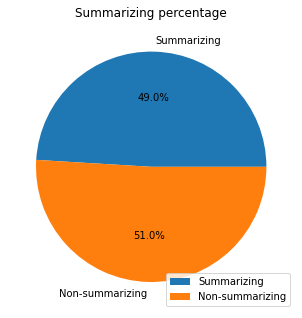

In [13]:
import numpy as np

monthList = df['sentence'].tolist()
facecream = df['summarizing'].tolist()

total=len(monthList)
prob = []

elements, counts = np.unique(df['summarizing'], return_counts=True)

prob.append(int(counts[1])/int(counts[0]+counts[1]))
prob.append(int(counts[0])/int(counts[0]+counts[1]))


products = ['Summarizing', 'Non-summarizing']
plt.pie(prob, autopct = '%.1f%%', labels = products)
plt.legend(loc = 'lower right', markerfirst = True, numpoints=1)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
plt.title('Summarizing percentage')
plt.style.use('default')
plt.show()

In [14]:
df2 = df.copy()
df2['sentence'] = df['sentence'].str.replace('[^\w\s]','') 
df2['sentence'] = df['sentence'].str.replace('[^א-ת ]','') 
df2.head(15)

,sentence,summarizing
0,והנפיחות בעיניים,0
1,ככלל כדאי להיות קשובים לגוף וכשאשר מופיעים סימ...,1
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,1
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,1
4,בייעוץ כזה יובאו בחשבון המסלול משך הטיול אופיו...,1
5,מי שלא מלאו לו יכול להיות זכאי לדמי אבטלה במק...,1
6,אתה תושב השטחים בעל תעודת זהות ישראלית ונפגעת ...,1
7,אצטדיון ספורט למעט במקומות שהוקצו לעישון בידי ...,1
8,לעיתים העור של התינוק יבש ונוטה לקילוף,1
9,טיפול התפתחותי לילד התהליך המלא עם הגעתכם לרו...,1


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

ttw = df2
ttw=ttw.fillna("")
ttw.dropna(inplace=True)
ttw2 = ttw.copy()
five_ttw=ttw2['sentence'].tolist()


# from sklearn.feature_extraction.text import TfidfVectorizer
first_time = datetime.now() 

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(five_ttw)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
first_time_final = datetime.now() - first_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_time_final))
df

Time elapsed in (hh:mm:ss.ms): "0:00:00.620311"


,אבא,אבות,אבחון,אבחוןטיפול,אבטלה,אבטלהלמי,אבטלהעובד,אבטלהתנאי,אבי,אביגור,...,תשלום,תשלומים,תשלמו,תשמע,תשמש,תת,תתבצע,תתבקש,תתכנס,תתקבל
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244246,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [16]:
from sklearn.metrics.pairwise import linear_kernel

first_cos_time = datetime.now() 

cosine_similarities = linear_kernel(vectors)

first_cos_time_final = datetime.now() - first_cos_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_cos_time_final))
pd.DataFrame(cosine_similarities, index = five_ttw, columns = five_ttw)



Time elapsed in (hh:mm:ss.ms): "0:00:00.002991"


,והנפיחות בעיניים,ככלל כדאי להיות קשובים לגוף וכשאשר מופיעים סימנים חריגים דוגמת קוצר נשימה במאמץ כאבים בלתי אופייניים בחזה ולא להסס ולפנות להתייעצות רפואית או לעזרה רפואית,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקויים הרפואיים שאתה סובל מהם וכיצד הם משפיעים על אורך חייך והתפקוד היוםיומי,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים המיוחדים בחינוך הרגיל לפיכך הפניית תלמיד לחינוך מיוחד תיערך רק לאחר שמוצו כל אפשרויות הטיפול בחינוך הרגיל,בייעוץ כזה יובאו בחשבון המסלול משך הטיול אופיו ההיסטוריה הרפואית האישית התרופות הקבועות שאותן נוטלים אלרגיות שונות שמהן סובלים המצב החיסוני וכל המשתנים הרלוונטיים,מי שלא מלאו לו יכול להיות זכאי לדמי אבטלה במקרים מסוימים למידע נוסף לחצו כאן,אתה תושב השטחים בעל תעודת זהות ישראלית ונפגעת בתחום הקו הירוק,אצטדיון ספורט למעט במקומות שהוקצו לעישון בידי הנהלת האצטדיון אם הוקצו כמפורט בחוק,לעיתים העור של התינוק יבש ונוטה לקילוף,טיפול התפתחותי לילד התהליך המלא עם הגעתכם לרופא הילדים בעקבות המלצה של גורם מקצועי או בשל חששות שהתעוררו אצלכם יבחן הרופא את השאלונים שבידיכם יקשיב לבקשתכם ויחליט אם להפנות את הילד לאבחון,...,בשביל להיות מוג לב דרוש הרבה אומץ,הוא פחד לקום יום אחד,הוא התרגל לתשואות ההמונים,הוא התרגל לכבוד להערכה,לא ידע אם הוא באמת ראוי להם,האם אוהבים אותו כי הוא מצחיק משעשע,יש לו מסיכה של ביטחון עצמי,אז יום אחד הוא בכה,ולמה אתם לא בוכים,טוב אז זה בדיוק מה שאין לי
והנפיחות בעיניים,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
ככלל כדאי להיות קשובים לגוף וכשאשר מופיעים סימנים חריגים דוגמת קוצר נשימה במאמץ כאבים בלתי אופייניים בחזה ולא להסס ולפנות להתייעצות רפואית או לעזרה רפואית,0.0,1.000000,0.011078,0.000000,0.0,0.022824,0.000000,0.0,0.000000,0.008914,...,0.029507,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקויים הרפואיים שאתה סובל מהם וכיצד הם משפיעים על אורך חייך והתפקוד היוםיומי,0.0,0.011078,1.000000,0.007592,0.0,0.000000,0.000000,0.0,0.000000,0.025669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים המיוחדים בחינוך הרגיל לפיכך הפניית תלמיד לחינוך מיוחד תיערך רק לאחר שמוצו כל אפשרויות הטיפול בחינוך הרגיל,0.0,0.000000,0.007592,1.000000,0.0,0.000000,0.040348,0.0,0.000000,0.030951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
בייעוץ כזה יובאו בחשבון המסלול משך הטיול אופיו ההיסטוריה הרפואית האישית התרופות הקבועות שאותן נוטלים אלרגיות שונות שמהן סובלים המצב החיסוני וכל המשתנים הרלוונטיים,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
האם אוהבים אותו כי הוא מצחיק משעשע,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.068098,0.069328,0.069328,0.065427,1.000000,0.0,0.072383,0.0,0.000000
יש לו מסיכה של ביטחון עצמי,0.0,0.000000,0.000000,0.000000,0.0,0.068876,0.000000,0.0,0.042916,0.019899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000
אז יום אחד הוא בכה,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.413887,0.089326,0.089326,0.084301,0.072383,0.0,1.000000,0.0,0.189841
ולמה אתם לא בוכים,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.071024,0.000000,0.0,0.000000,1.0,0.000000


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [18]:
X = df2['sentence']
y = df2['summarizing']

first_cos_time = datetime.now() 
#TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

first_cos_time_final = datetime.now() - first_cos_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_cos_time_final))

Time elapsed in (hh:mm:ss.ms): "0:00:00.014986"


In [19]:

# ComplementNB standard multinomial naive Bayes (MNB) algorithm 
time1 = datetime.now() 

clf = ComplementNB()
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)
comp_score = accuracy_score(y_test, y_pred)
print(comp_score)
time1 = datetime.now() - time1
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time1))



time2 = datetime.now() 
# MultinomialNB naive Bayes algorithm for multinomially distributed data

clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_dtm, y_train)
y_pred = clf_mnb.predict(X_test_dtm)
mnb_score = accuracy_score(y_test, y_pred)
print(mnb_score)
time2 = datetime.now() - time2
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time2))

0.825531914893617
Time elapsed in (hh:mm:ss.ms): "0:00:00.001996"
0.825531914893617
Time elapsed in (hh:mm:ss.ms): "0:00:00.000997"


In [20]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [21]:


time3 = datetime.now() 
# BernoulliNB multivariate Bernoulli distributions


clf = BernoulliNB()
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)
bern_score = accuracy_score(y_test, y_pred)
print(bern_score)
time3 = datetime.now() - time3
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time3))



time4 = datetime.now() 
# Gaussian Naive Bayes algorithm for classification

gausnb = GaussianNB()
gausnb.fit(X_train_dtm.toarray(), y_train)
y_pred = gausnb.predict(X_test_dtm.toarray())
gausnb_score = accuracy_score(y_test, y_pred)
print(gausnb_score)
time4 = datetime.now() - time4
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time4))

0.6808510638297872
Time elapsed in (hh:mm:ss.ms): "0:00:00.000998"
0.7914893617021277
Time elapsed in (hh:mm:ss.ms): "0:00:00.044880"


In [22]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [23]:
from sklearn.linear_model import LogisticRegression
time6 = datetime.now() 

clf = LogisticRegression(random_state=0)
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)

acc_score = accuracy_score(y_test, np.round(abs(y_pred)))

print(acc_score)
time6 = datetime.now() - time6
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time6))

0.8212765957446808
Time elapsed in (hh:mm:ss.ms): "0:00:00.009972"


In [24]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)